# Semantic Measurement

A notebook showing some natural processing capiblilities in the Data Mountain Query package:
   * Hedonometer - Sentiment Measurement with LabMT
   * Ousiometer - Power, Danger, Structure semantic measurements
   * Plotting - Sentiment Shifts, Allotaxonographs, etc.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


from data_mountain_query.regexr import get_ngrams_parser, remove_whitespaces, ngrams
from data_mountain_query import counter
from data_mountain_query.parsers import parse_text
from data_mountain_query.sentiment import load_happs_scores, load_vad_scores, load_pds_scores, filter_by_scores, counter_to_dict, counter_sentiment
from data_mountain_query.sentiment_plot import general_sentiment_shift

try:
    import importlib.resources as pkg_resources
except ImportError:
    import importlib_resources as pkg_resources

In [2]:
def tokenize(texts, scheme=1):
    """ Break text into ngram counters"""

    text_counter = counter.TextCounter({})

    with pkg_resources.as_file(pkg_resources.files("pkg_data").joinpath(f"ngrams.bin")) as ngrams_pth:
         ngrams_parser = get_ngrams_parser(ngrams_pth)

    for text in texts:
        text_counter += parse_text(text, ngrams_parser, scheme)

    return text_counter

def ousiometer_score(text_counter, semantic_type='power', language='en'):
    """ Get power/danger/structure scores
    
    Args:
        text_counter: counter object with ngram counts
        
        semantic_type: string specifying which lexicon to use. 
            Choose from {'power', 'danger', 'structure', 
                        'valance', 'arousal', 'dominance', 
                        'goodness', 'energy', 'structure'}
                        
        language: string specifying which language scores to use.
            Choose from {'Afrikaans', 'Albanian', 'Amharic', 'Arabic',
            'Armenian', 'Azerbaijani', 'Basque', 'Belarusian', 'Bengali',
            'Bosnian', 'Bulgarian', 'Catalan','Chichewa', 'Chinese-Simplified'
            'Corsican', 'Croatian', 'Czech', 'Danish', 'Dutch', 'Esperanto',
            'Estonian', 'Filipino', 'Finnish', 'French', 'Frisian', 'Galician',
            'Georgian', 'German', 'Greek', 'Gujarati', 'Haitian-Creole', 'Hausa',
            'Hebrew', 'Hindi', 'Hungarian', 'Icelandic', 'Igbo', 'Indonesian', 'Irish',
            'Italian', 'Japanese', 'Javanese', 'Kannada', 'Kazakh', 'Khmer', 'Kinyarwanda',
            'Korean', 'Kurdish-Kurmanji', 'Lao', 'Latin', 'Latvian', 'Lithuanian',
            'Luxembourgish', 'Macedonian', 'Malagasy', 'Malay', 'Malayalam', 'Maltese',
            'Maori', 'Marathi', 'Mongolian', 'Nepali', 'Norwegian', 'Pashto','Persian',
            'Polish', 'Portuguese', 'Punjabi', 'Romanian', 'Russian', 'Samoan',
            'Serbian', 'Shona', 'Sindhi', 'Sinhala', 'Slovak', 'Slovenian', 'Somali',
            'Spanish', 'Sundanese', 'Swahili', 'Swedish', 'Tajik', 'Tamil', 'Tatar',
            'Telugu', 'Thai', 'Turkish', 'Turkmen', 'Ukrainian', 'Urdu',
            'Uyghur', 'Uzbek', 'Vietnamese', 'Welsh', X'hosa', 'Yiddish', 'Yoruba',
            'Zulu',}
            
            
        Return: return sentiment measurement as a float
        
        """
    
    word2score = load_vad_scores(semantic_type=semantic_type, language=language)
    return counter_sentiment(text_counter,word2score)

def sentiment_score(text_counter, lang='english_v2'):
    """Compute sentiment scores
    
    Args:
        text_counter: counter object with ngram counts
        
        lang: string specifying which lexicon to use
            Choose from {'english_v2', 'russian', 'german',
            'spanish', 'french', 'korean', 'indonesian', 'pashto',
            'portuguese', 'urdu', '_ukraine_from_russian', 'arabic',
            '_malay_from_english', '_farsi_from_english', '_finnish_from_english',
            '_italian_from_english', '_polish_from_english', '_tagalog_from_english',
            '_dutch_from_english',}
        
    Return: sentiment measurement returned as a float
    
    """
    word2score = load_happs_scores(lang=lang)
    return counter_sentiment(text_counter, word2score)


### Semantic Measurements

Included in this package are methods using semantic lexicons to measure text data.

We have tools to measure sentiment using the LabMT lexicon using human surveryed scores for words from 1 to 9, from saddest to happiest. Aggregate measurements can be made using the `sentiment_score` function. 

We also have lexicons to measure other semantic dimensions, such as "power", "danger", and "structure". Aggregate measurements can be run on text using the `ousiometer_score` function.

In [22]:
text = ['El niño triste continúa adelante a pesar de su renuencia a soportar el duro trabajo que le espera.']
text_counter = tokenize(text)
lang='es'
print("Tokenized text: ")
print(text_counter)
print()
# can switch language to english
print(f"LabMT sentiment:\n\t {sentiment_score(text_counter, lang='spanish')[0]}")
print()
for semantic_type in ['valence', 'arousal', 'dominance']:
    print(f"Ousiometer - {semantic_type} score:\n\t {ousiometer_score(text_counter, semantic_type, language='Spanish')[0]}")
print()


text2 = ['El zorro maloliente atacó al asustado ratón de campo y le robó el preciado queso. adelante']
text_counter2 = tokenize(text2)
print("Tokenized text: ")
print(text_counter)




Tokenized text: 
{'el': Texton(count=2), 'niño': Texton(count=1), 'triste': Texton(count=1), 'continúa': Texton(count=1), 'adelante': Texton(count=1), 'a': Texton(count=2), 'pesar': Texton(count=1), 'de': Texton(count=1), 'su': Texton(count=1), 'renuencia': Texton(count=1), 'soportar': Texton(count=1), 'duro': Texton(count=1), 'trabajo': Texton(count=1), 'que': Texton(count=1), 'le': Texton(count=1), 'espera': Texton(count=1), '.': Texton(count=1)}

LabMT sentiment:
	 5.868

Ousiometer - valence score:
	 0.39566666666666667
Ousiometer - arousal score:
	 0.45133333333333336
Ousiometer - dominance score:
	 0.4211111111111111

Tokenized text: 
{'el': Texton(count=2), 'niño': Texton(count=1), 'triste': Texton(count=1), 'continúa': Texton(count=1), 'adelante': Texton(count=1), 'a': Texton(count=2), 'pesar': Texton(count=1), 'de': Texton(count=1), 'su': Texton(count=1), 'renuencia': Texton(count=1), 'soportar': Texton(count=1), 'duro': Texton(count=1), 'trabajo': Texton(count=1), 'que': Text

### Shifterator Figures
To compare the individual contributions to a difference in semantic measurements, we use the `shifterator` package to visualize word shifts.

The function `general_sentiment_shift` acts as a wrapper to this package, and takes a dictionary of words with semantic scores and frequency dictionaries for each corpus to generate word shift plots.

/Users/michael/miniconda3/envs/data-mountain-query/lib/python3.11/site-packages/shifterator/plotting.py:604: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


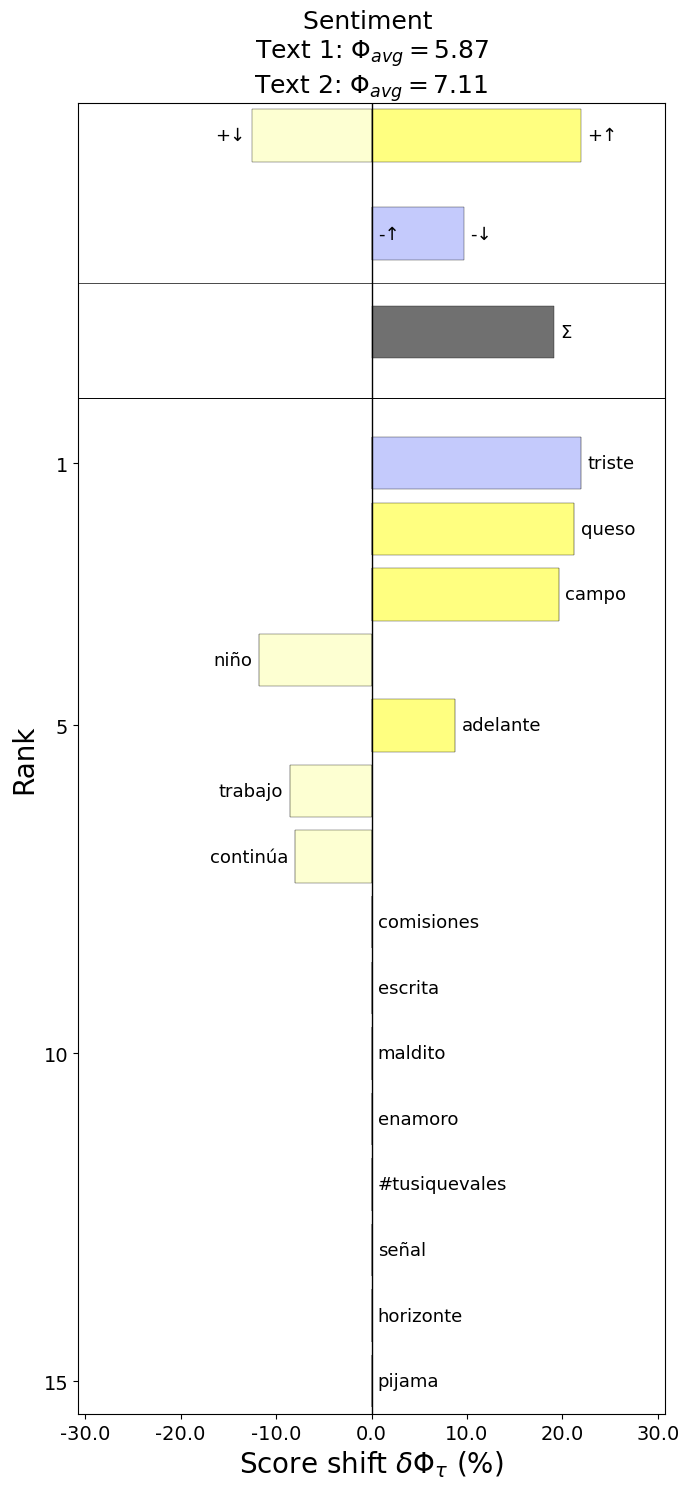

/Users/michael/miniconda3/envs/data-mountain-query/lib/python3.11/site-packages/shifterator/plotting.py:604: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


{'el': Texton(count=2), 'zorro': Texton(count=1), 'maloliente': Texton(count=1), 'atacó': Texton(count=1), 'al': Texton(count=1), 'asustado': Texton(count=1), 'ratón': Texton(count=1), 'de': Texton(count=1), 'campo': Texton(count=1), 'y': Texton(count=1), 'le': Texton(count=1), 'robó': Texton(count=1), 'preciado': Texton(count=1), 'queso': Texton(count=1), '.': Texton(count=1), 'adelante': Texton(count=1)}

LabMT sentiment:
	 7.113

Ousiometer - valence score:
	 0.447
Ousiometer - arousal score:
	 0.552
Ousiometer - dominance score:
	 0.400



In [25]:
type2freq_1 = counter_to_dict(text_counter, 'count')
type2freq_2 = counter_to_dict(text_counter2, 'count')

# use LabMT Sentiment Score
type2score = load_happs_scores(lang='spanish')

titles = ['Sentiment \nText 1', 'Text 2']

general_sentiment_shift(type2freq_1, type2freq_2, type2score=type2score, titles=titles, top_n=15)
plt.show()

# use VAD Arousal scores
semantic_type = 'dominance'
type2score = load_vad_scores(semantic_type, language='Spanish')

titles = [f'{semantic_type.capitalize()} \nText 1', 'Text 2']
general_sentiment_shift(type2freq_1, type2freq_2, type2score=type2score, titles=titles, top_n=15)
plt.show()
print(text_counter2)
print()
print(f"LabMT sentiment:\n\t {sentiment_score(text_counter2, 'spanish')[0]:.3f}")
print()
for semantic_type in ['valence', 'arousal', 'dominance']:
    print(f"Ousiometer - {semantic_type} score:\n\t {ousiometer_score(text_counter2, semantic_type, 'Spanish')[0]:.3f}")
print()
